<a href="https://colab.research.google.com/github/Chetan-Sagathiya/mnist-digit-classification/blob/master/mnist_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(x_train), len(x_test))

60000 10000


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

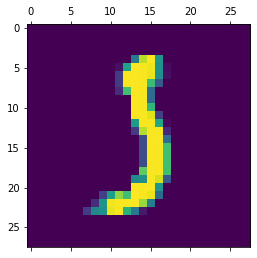

5


In [ ]:
plt.matshow(x_train[132])
plt.show()
print(y_train[132])

In [ ]:
x_train.shape

In [ ]:
y_train.shape

(60000,)

In [ ]:
## scaling data to impove accuracy
x_train  = x_train/255
x_test  = x_test/255

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_test_flattened.shape

(10000, 784)

In [ ]:
## neural network with 1 hidden layers
model = keras.Sequential([
    keras.layers.Dense(units=10, input_dim=784, activation='sigmoid')                   
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4853 - accuracy: 0.8755
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3056 - accuracy: 0.9159
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2851 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2744 - accuracy: 0.9245
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9265
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2627 - accuracy: 0.9285
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2588 - accuracy: 0.9287
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2526 - accuracy: 0.9311
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.249

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.9272


[0.26104071736335754, 0.9272000193595886]

In [ ]:
y_predicted = model.predict(x_test_flattened)

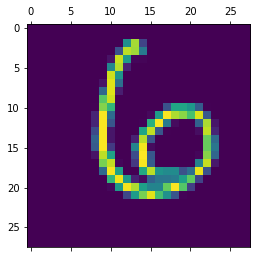

In [ ]:
plt.matshow(x_test[100])

In [ ]:
import numpy as np
np.argmax(y_predicted[100])


6

In [ ]:
y_predicted = [np.argmax(value) for value in y_predicted]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, y_predicted)

0.9272

In [ ]:
y_predicted[1]

2

In [ ]:
import tensorflow as tf

In [ ]:
cm  = tf.math.confusion_matrix(y_test, y_predicted)

Text(51.0, 0.5, 'actual')

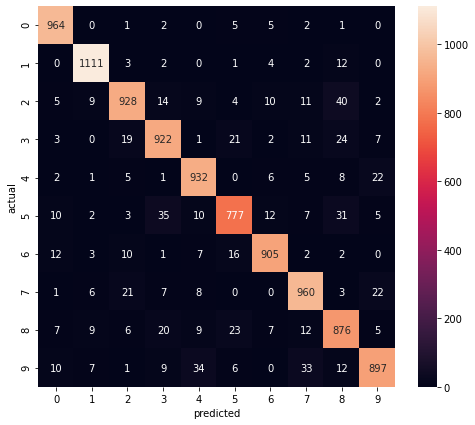

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [ ]:
## with hidden layer
model = keras.Sequential([
    keras.layers.Dense(units=100, activation='relu', input_dim=784, kernel_initializer='he_uniform'),
    keras.layers.Dense(units=10, activation='relu', kernel_initializer='he_uniform')
])

model.compile(
    optimizer ='adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3156 - accuracy: 0.1812
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2504 - accuracy: 0.1221
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2911 - accuracy: 0.1039
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3024 - accuracy: 0.0988
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3024 - accuracy: 0.0988


In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.0980


[2.30259108543396, 0.09799999743700027]

In [ ]:
y_predict = [np.argmax(value) for value in model.predict(x_test_flattened)]

In [ ]:
accuracy_score(y_test, y_predict)

0.098

In [ ]:
cm  = tf.math.confusion_matrix(y_test, y_predict)

Text(51.0, 0.5, 'actual')

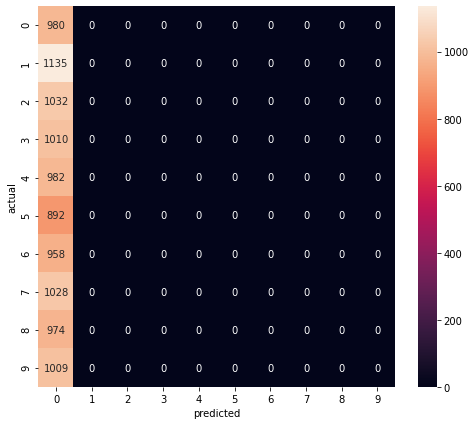

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')